In [1]:
#MDF_comment fijate que esta parte del código sí vale la pena ejecutarla en otra celda. cada vez que 
# ejecutes la celda volves a importar numpy y matplotlib. Esto te puede sacar algo de tiempo cada 
# vez que ejecutas el programa. Fijate que es una de las ventajas de la ejecucion por porción
# del jupyter notebook: no neceitas volver a ejecutar partes que no son necesarias. 
import numpy as np
import matplotlib.pyplot as plt
# yo lo separo para que quede.

#MDF la idea de esto era que los datos los leamos del archivo de datos.
#MDF la definición tampoco necesitas ejecutarla cada vez que probas el código. 
Z = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
T = np.array([70.0, 68.0, 55.0, 22.0,13.0,11.0,10.0])
#MDF_Comment lo mismo con esto.
n = len(Z)
H = [] 
D = np.zeros(n)
#MDF_COMMENT esto también pasa lo mismo.
for i in range (n-1):
  H.append(Z[i+1]-Z[i])

#MDF_comment y en realidad hasta acá, sólo tenes definiciones, puede estar separado de la parte de abajo
#MDF_comment donde tenes el código que tenes que debuguear.
matriz = np.zeros([n,n])

Como te digo en los comentarios, las definiciones pueden estar separadas de lo que viene abajo, que es metodológico. cuando terminás todo podes volver a juntarlo.

In [2]:
for i in range (1,n-1):   #ojo que la posicion M[n] no existe 
  matriz[i,i-1] = H[i-1]
  matriz[i,i] = 2 * (H[i] + H[i-1])
  matriz[i,i+1] = H[i]
  D[i] = (T[i+1]-T[i])/H[i]-(T[i]-T[i-1])/H[i-1] #Si arranca en 0 , cuenta desde atras los H[-1]  ,
#MDF_Comment y vamos a dejar esto separado que es lo que queremos revisar

D[0] = 0
D[n-1] = 0

D = D * 3  
matriz[0,0] = 1
matriz[n-1,n-1] = 1

In [3]:
matriz

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 2. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 2. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 2. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0.5, 2. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0.5, 2. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [4]:
D

array([   0.,  -66., -120.,  144.,   42.,    6.,    0.])

In [5]:
b = np.linalg.solve(matriz,D)

d = np.zeros(n-1)
a = np.zeros(n-1)
c = np.zeros(n-1)

# Sol = d + a() + b() + c ()

for i in range (n-1):
    d[i] = T[i]
    a[i] = (1/3) * (b[i+1]-b[i])/H[i]
    c[i] = ((T[i+1]-T[i])/H[i]) - b[i] * H[i] - (H[i]**2) * a[i]

``` python
T = (a,b,c,d)
P = np.transpose(T) # no estan bien las dimensiones, transpose no esta funcionando pero no se porque 
                    #y me devuelve una matriz con 4 filas de 6 columnas y no al revez
```

### Primer problema
La variable T está pisando tu variable T original con los valores de temperatura

### segundo problema
estas definiendo T como un _tuple_ y no como una lista o np array. por lo tanto, el transpose no está haciendo lo que todos esperaríamos. 

### tercer problema
El problema con la función transpose es que funciona como lo estas pensando en los objetos de dos dimensiones. en este caso `T` es un objeto de una dimensión (un tupple de np arrays), por lo que transpose no le hace nada. fijate el ejemplo en clase de introducción para el caso de 1D.
La forma correcta de hacerlo es con `reshape`.

Si tenes 

In [6]:
# arrancamos con definir bien la T
# T = [a, b, c, d]
P = np.vstack([a , b[:-1], c, d]).transpose()
#MDF_COMMENT vstack te apila los vectres de 1 d a lo large de la dimensión 0 (las filas)

Y en realidad por el código que tenes abajo no necesitas transponer

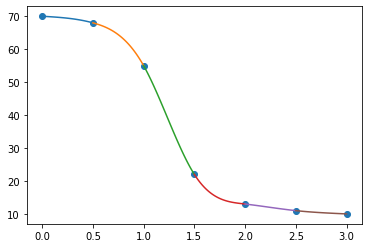

In [7]:
#mdf_comment print(TT)
#mdf_comment print(P)

for i in range (n-1):
    x = np.linspace(Z[i],Z[i+1],100)
    y = np.polyval(P[i] , x - Z[i])
    plt.plot(x,y)


plt.scatter(Z,T)
plt.show()  

In [8]:
A = np.array([[1,0],[3,4]])
print(A)
L = np.transpose(A)
print(L)

[[1 0]
 [3 4]]
[[1 3]
 [0 4]]
